In [1]:
import pandas as pd

# dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('data_balita.csv')
import torch
from torchvision import datasets
# mengecek missing values
data.isnull().sum()
def checkBalance(dataset, names):
    # Assuming 'label' is the column containing the class labels in your DataFrame
    clsnames = dataset['Status Gizi'].unique()  # Get unique class labels from the 'label' column
    totalclasses = len(clsnames)
    totalperclass = [0] * totalclasses

    # Iterate through the DataFrame and count occurrences of each class
    for index, row in dataset.iterrows():
        targetclass = list(clsnames).index(row['Status Gizi'])  # Get the index of the class label
        totalperclass[targetclass] += 1

    print(f'{names} {sum(totalperclass)}')  # Use 'names' instead of 'name'
    for idx, classSum in enumerate(totalperclass):
        print(f'{classSum} {clsnames[idx]} {classSum/sum(totalperclass)*100:0.1f}%')



Saving data_balita.csv to data_balita.csv


Mengecek Missing Value

In [2]:
data.isna().sum()

,0
Umur (bulan),0
Jenis Kelamin,0
Tinggi Badan (cm),0
Status Gizi,0


In [ ]:
checkBalance(data,"Data Balita")

Data Balita 120999
13815 stunted 11.4%
19560 tinggi 16.2%
67755 normal 56.0%
19869 severely stunted 16.4%


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Mengecek Outlier

In [10]:
Q1=data['Umur (bulan)'].quantile(0.25)
Q3=data['Umur (bulan)'].quantile(0.75)
IQR=Q3-Q1
print('Q1 = ',Q1)
print('Q3 = ',Q3)
print('IQR = ',IQR)
nilai_min=data['Umur (bulan)'].min()
nilai_max=data['Umur (bulan)'].max()
min_IQR=Q1-(1.5*IQR)
max_IQR=Q3+(1.5*IQR)
print('Nilai Minimum = ',nilai_min)
print('Nilai Maximum = ',nilai_max)
print('Nilai Minimum IQR = ',min_IQR)
print('Nilai Maximum IQR = ',max_IQR)
if(nilai_min<min_IQR):
  print('Low Outlier')

print('Low Outlier Index:',list(data[data['Umur (bulan)']<min_IQR].index))

# kondisi high outlier
if(nilai_max>max_IQR):
  print('High Outlier')
print('High Outlier Index:',list(data[data['Umur (bulan)']>max_IQR].index))

Q1 =  15.0
Q3 =  45.0
IQR =  30.0
Nilai Minimum =  0
Nilai Maximum =  60
Nilai Minimum IQR =  -30.0
Nilai Maximum IQR =  90.0
Low Outlier Index: []
High Outlier Index: []


In [9]:
Q1 = data['Tinggi Badan (cm)'].quantile(0.25)
Q3 = data['Tinggi Badan (cm)'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['Tinggi Badan (cm)'] < Q1 - 1.5 * IQR) | (data['Tinggi Badan (cm)'] > Q3 + 1.5 * IQR)]
print("Outlier (DataFrame):")
print(outliers)

Outlier (DataFrame):
      Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
1009             0     perempuan          40.235944  severely stunted
1056             0     perempuan          40.058140  severely stunted
1104             0     perempuan          40.602533  severely stunted
1165             0     perempuan          40.285473  severely stunted
1179             0     perempuan          40.252380  severely stunted
1195             0     perempuan          40.539600  severely stunted
1252             0     perempuan          40.021110  severely stunted
1258             0     perempuan          40.268891  severely stunted
1302             0     perempuan          40.340323  severely stunted
1303             0     perempuan          40.171322  severely stunted
1304             0     perempuan          40.152816  severely stunted
1350             0     perempuan          40.154283  severely stunted
1385             0     perempuan          40.029406  severely stunted

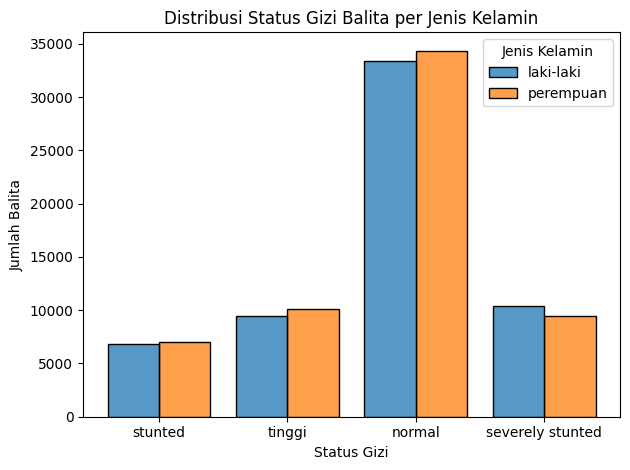

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data_balita.csv')

# Plot histogram-style countplot with bars side by side
sns.histplot(data=df, x='Status Gizi', hue='Jenis Kelamin', multiple='dodge', shrink=0.8)

# Styling
plt.title("Distribusi Status Gizi Balita per Jenis Kelamin")
plt.xlabel("Status Gizi")
plt.ylabel("Jumlah Balita")
plt.tight_layout()
plt.show()


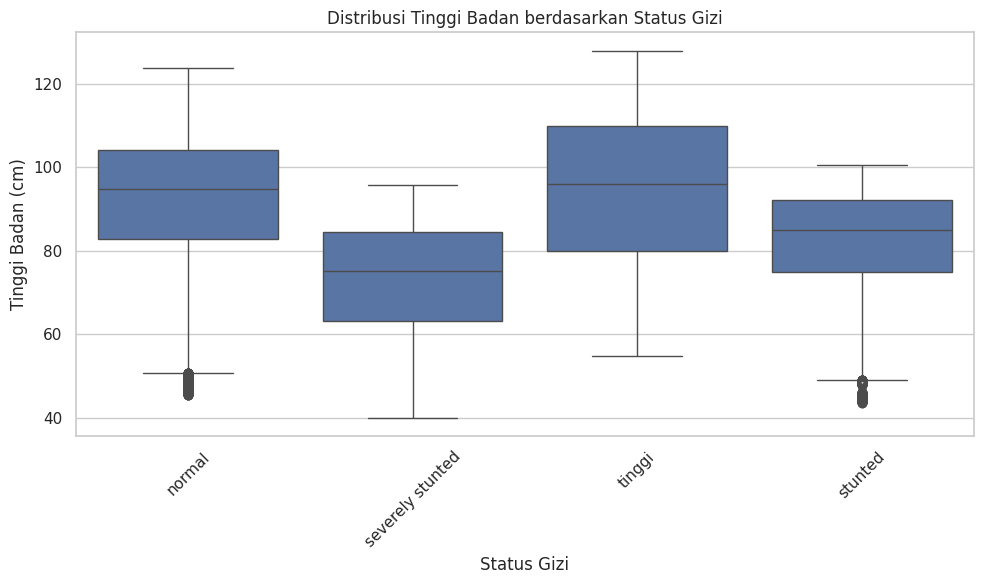

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_balita.csv')

# Set the plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Status Gizi',
    y='Tinggi Badan (cm)',
    order=df['Status Gizi'].value_counts().index  # order by frequency
)
plt.title("Distribusi Tinggi Badan berdasarkan Status Gizi")
plt.xlabel("Status Gizi")
plt.ylabel("Tinggi Badan (cm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


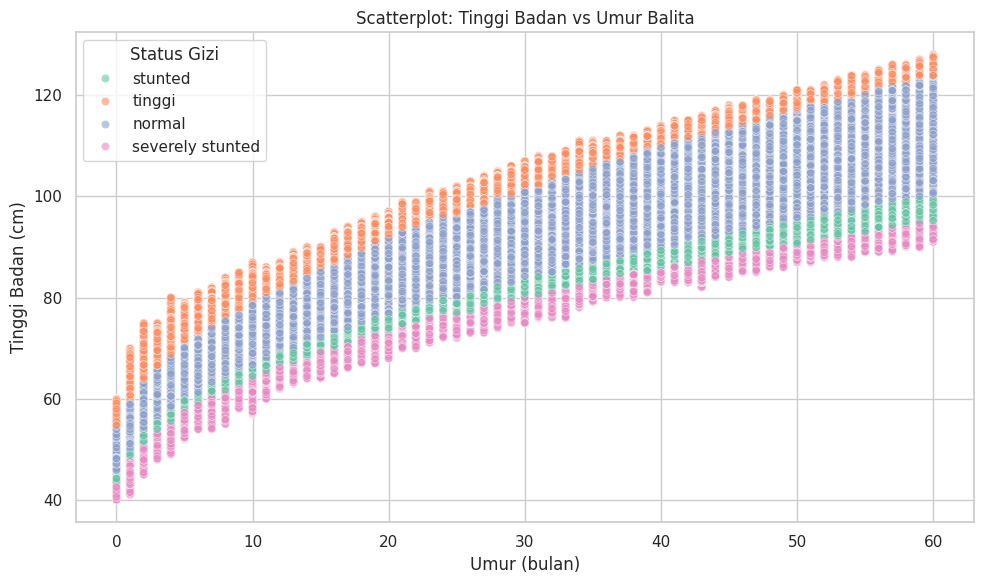

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_balita.csv')

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Umur (bulan)',
    y='Tinggi Badan (cm)',
    hue='Status Gizi',
    alpha=0.6,
    palette='Set2'
)
plt.title("Scatterplot: Tinggi Badan vs Umur Balita")
plt.xlabel("Umur (bulan)")
plt.ylabel("Tinggi Badan (cm)")
plt.legend(title='Status Gizi')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Gabungkan label status gizi
data["Status Gizi"] = data["Status Gizi"].replace({
    "tinggi": "tidak stunted",
    "normal": "tidak stunted",
    "stunted": "stunted",
    "severely stunted": "stunted"
})

# Encoding variabel kategorik
le_gender = LabelEncoder()
data["Jenis Kelamin"] = le_gender.fit_transform(data["Jenis Kelamin"])

# Tampilkan hasil transformasi
data["Status Gizi"].value_counts(), data.head()


(Status Gizi
 tidak stunted    87315
 stunted          33684
 Name: count, dtype: int64,
    Umur (bulan)  Jenis Kelamin  Tinggi Badan (cm)    Status Gizi
 0             0              0          44.591973        stunted
 1             0              0          56.705203  tidak stunted
 2             0              0          46.863358  tidak stunted
 3             0              0          47.508026  tidak stunted
 4             0              0          42.743494        stunted)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
# Pisahkan fitur dan target
X = data.drop("Status Gizi", axis=1)
y = data["Status Gizi"]

# Encode target label
le_status = LabelEncoder()
y_encoded = le_status.fit_transform(y)  # 0: stunted, 1: tidak stunted

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_resampled, y_resampled)
best_rf = rf_grid.best_estimator_

# b. ANN (MLPClassifier)
ann_param_grid = {
    'hidden_layer_sizes': [(32,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}
ann_grid = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), ann_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
ann_grid.fit(X_resampled, y_resampled)
best_ann = ann_grid.best_estimator_

# === 6. Evaluasi Model ===
# Random Forest
rf_preds = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest Report:\n", classification_report(y_test, rf_preds, target_names=le_status.classes_))

# ANN
ann_preds = best_ann.predict(X_test)
print("ANN Accuracy:", accuracy_score(y_test, ann_preds))
print("ANN Report:\n", classification_report(y_test, ann_preds, target_names=le_status.classes_))

# Optional: Print best parameters
print("Best Parameters RF:", rf_grid.best_params_)
print("Best Parameters ANN:", ann_grid.best_params_)

Random Forest Accuracy: 0.9997933884297521
Random Forest Report:
                precision    recall  f1-score   support

      stunted       1.00      1.00      1.00      6737
tidak stunted       1.00      1.00      1.00     17463

     accuracy                           1.00     24200
    macro avg       1.00      1.00      1.00     24200
 weighted avg       1.00      1.00      1.00     24200

ANN Accuracy: 0.9948347107438017
ANN Report:
                precision    recall  f1-score   support

      stunted       0.99      0.99      0.99      6737
tidak stunted       0.99      1.00      1.00     17463

     accuracy                           0.99     24200
    macro avg       0.99      0.99      0.99     24200
 weighted avg       0.99      0.99      0.99     24200

Best Parameters RF: {'max_depth': None, 'n_estimators': 100}
Best Parameters ANN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32)}


In [ ]:
# menegcek proposisi data training setelah SMOTE
import numpy as np

def checkBalance(data, title="Data"):
    unique, counts = np.unique(data, return_counts=True)
    total = sum(counts)
    print(f"\n{title}")
    for label, count in zip(unique, counts):
        print(f"Label {label}: {count} ({count/total:.2%})")
checkBalance(y_resampled, "After SMOTE (Training Set)")


After SMOTE (Training Set)
Label 0: 69852 (50.00%)
Label 1: 69852 (50.00%)


In [ ]:
# Evaluasi model menggunakan AUC
from sklearn.metrics import roc_auc_score, roc_curve
ann_probs = best_ann.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas "1" (tidak stunted)
ann_auc = roc_auc_score(y_test, ann_probs)
print("AUC Score ANN:", ann_auc)


AUC Score ANN: 0.9999019194772254


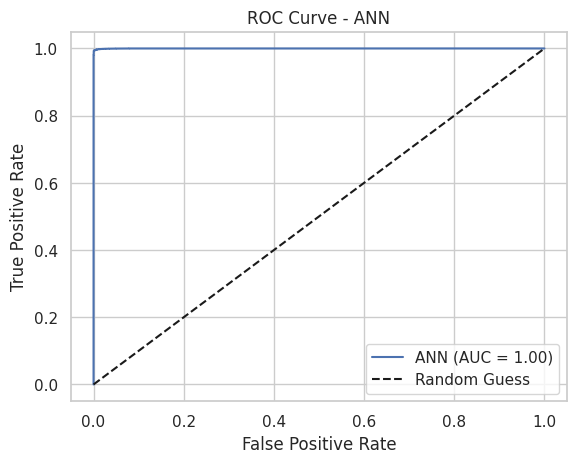

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, ann_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ANN (AUC = {ann_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend()
plt.grid(True)
plt.show()
